# COGS 108 - Final Project 

# Overview

In this project, I am going to see how the average amount of calls for distrubance of the peace has been affected by the Covid-19 pandemic in San Diego. People have keeping their neighbors vigilant in order to prevent the spread of disease. For example, some people have been throwing parties and being shut down by their neighbors. Of course this always happens, but the news coverage of events getting shut down in recent months has been more frequent. 

# Name & GitHub

- Name: Kyle Cook
- GitHub Username: kpcook

# Research Question

What is the relaitonship between covid-19 and the frequency of disturbance of the peace calls in San Diego?

## Background and Prior Work


References (include links):
- 1) This link include information about how neighbors have become 
https://www.cbs8.com/article/features/producers-picks/neighbors-calling-out-other-neighbors-for-not-following-social-distancing-rules/509-6dd6b215-6621-49e1-bd98-9306c1bd92f0
- 2) Evidence of parties being thrown and shut down by neighbors
https://www.cbs8.com/article/news/health/coronavirus/san-diego-state-sdsu-neighbors-out-of-control-pandemic-parties-covid-super-spreader/509-f6edccc3-594f-446b-a029-72d2ae322336
- 3)Information on when the lockdown in California Began
https://www.ksla.com/2020/03/20/california-becomes-first-state-order-lockdown/

# Hypothesis


I hypothesize that the calls to police from 2020 will show an increase in disturbance of the peace calls due to the effects of the Covid-19 Pandemic in San Diego. 

# Dataset(s)



(Copy this information for each dataset)
- Dataset Name: pd_calls_for_service_2019_datasd.csv
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 590967

This dataset includes the police call types recieved to San Diego County police along with the location and time of 

- Dataset Name: pd_calls_for_service_2020_datasd.csv
- Link to the dataset: https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 522569

Since these datasets have the same variables and are just obersvations from a different year, I will concatenate the two datasets after obtaining monthly averages of calls for each year. 

# Setup

In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

calls_2019 = pd.read_csv('/Users/kylecook/individual_fa20/data/pd_calls_for_service_2019_datasd.csv')
calls_2020 = pd.read_csv('/Users/kylecook/individual_fa20/data/pd_calls_for_service_2020_datasd.csv')

# Data Cleaning

In [15]:
calls_2019.columns

Index(['incident_num', 'date_time', 'day_of_week', 'address_number_primary',
       'address_dir_primary', 'address_road_primary', 'address_sfx_primary',
       'address_dir_intersecting', 'address_road_intersecting',
       'address_sfx_intersecting', 'call_type', 'disposition', 'beat',
       'priority'],
      dtype='object')

Describe your data cleaning steps here.

In [16]:
#Drop columns that are not need for the analysis.
calls_2019 = calls_2019.drop(["incident_num", "day_of_week", "address_number_primary", "address_dir_primary", 
                              "address_road_primary", "address_sfx_primary", 
                              "address_dir_intersecting", "address_road_intersecting", 
                              "address_sfx_intersecting", "beat", "priority"], axis=1)
calls_2020 = calls_2020.drop(["incident_num", "day_of_week", "address_number_primary", "address_dir_primary", 
                              "address_road_primary", "address_sfx_primary", 
                              "address_dir_intersecting", "address_road_intersecting", 
                              "address_sfx_intersecting", "beat", "priority"], axis=1)

In [17]:
#checks for Null observations in 2019
null_rows = calls_2019.isnull().any(axis=1)
calls_2019[null_rows].shape

(3743, 3)

In [18]:
#checks for Null observations in 2020
null_rows = calls_2020.isnull().any(axis=1)
calls_2020[null_rows].shape

(1167, 3)

In [19]:
#drops null rows
calls_2019 = calls_2019.dropna().reset_index(drop=True)
calls_2020 = calls_2020.dropna().reset_index(drop=True)

In [20]:
#Parses date_time and gets rid of call_types that are not calls for disturbance of the peace

calls_2019['call_type'] = calls_2019['call_type'].astype(str)
calls_2020['call_type'] = calls_2020['call_type'].astype(str)

calls_2019 = calls_2019[calls_2019['call_type'] == '415'].drop(['disposition'], axis=1).reset_index(drop=True)
calls_2020 = calls_2020[calls_2020['call_type'] == '415'].drop(['disposition'], axis=1).reset_index(drop=True)

calls_2019['date_time'] = calls_2019['date_time'].str[:10]
calls_2020['date_time'] = calls_2020['date_time'].str[:10]
calls_2019

,date_time,call_type
0,2019-01-01,415
1,2019-01-01,415
2,2019-01-01,415
3,2019-01-01,415
4,2019-01-01,415
...,...,...
50225,2019-12-31,415
50226,2019-12-31,415
50227,2019-12-31,415
50228,2019-12-31,415


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [21]:
#groups calls from the same day
calls_2019 = calls_2019.groupby(['date_time']).count()
calls_2020 = calls_2020.groupby(['date_time']).count()
calls_2019

,call_type
date_time,
2019-01-01,131
2019-01-02,114
2019-01-03,117
2019-01-04,159
2019-01-05,141
...,...
2019-12-27,136
2019-12-28,131
2019-12-29,131


In [22]:
#Gets the average amount of calls per month for each year
calls_2019 = calls_2019.reset_index()
calls_2020 = calls_2020.reset_index()

df_2019 = calls_2019
df_2019['month'] = df_2019['date_time'].str[5:7].astype(int)
df_2019 = df_2019.groupby('month').mean()
df_2019.columns = ['Disturbance_call_2019']

df_2020 = calls_2020
df_2020['month'] = df_2020['date_time'].str[5:7].astype(int)
df_2020 = df_2020.groupby('month').mean()
df_2020.columns = ['Disturbance_call_2020']

#Since calls_2020 does not have all of December's data, I dropped 
#2019's December data as well so the dataframe have the same shape.
#This is used later for plotting
calls_2019 = calls_2019.drop(['date_time', 'month'], axis=1)[:-30]
calls_2020 = calls_2020.drop(['date_time', 'month'], axis=1)

df_2020

,Disturbance_call_2020
month,
1,135.483871
2,138.482759
3,159.516129
4,207.566667
5,187.225806
6,142.655172
7,173.354839
8,162.935484
9,156.133333


In [23]:
#Creates final dataframe for analysis
df = pd.concat([df_2019, df_2020], axis=1).reset_index()
months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 
          6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 
          10: 'Oct', 11: 'Nov', 12: 'Dec'}
df = df.replace({'month': months})
df

,month,Disturbance_call_2019,Disturbance_call_2020
0,Jan,133.806452,135.483871
1,Feb,131.535714,138.482759
2,Mar,141.612903,159.516129
3,Apr,139.400000,207.566667
4,May,138.709677,187.225806
5,Jun,140.866667,142.655172
6,Jul,146.064516,173.354839
7,Aug,142.548387,162.935484
8,Sep,141.566667,156.133333
9,Oct,139.870968,154.290323


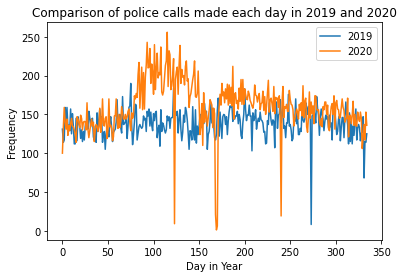

In [24]:
#Plots the count of calls from each day over each year
plt.plot(calls_2019.index, calls_2019.values, label = '2019')
plt.plot(calls_2020.index, calls_2020.values, label = '2020')
plt.xlabel('Day in Year')
plt.ylabel('Frequency')
plt.title('Comparison of police calls made each day in 2019 and 2020')
plt.legend()
plt.show()

Around day 100 there was a large increase in calls for disturbing the peace. Day 100 in the year is in March which is when the Covid-19 'stay-at-home' order began in California. Afterwards, the call count decreses a little, but the line continues to remain a above the 2019 line. In order to see whats going on we will look at the monthly mean for calls in 2019 and 2020. 

<AxesSubplot:xlabel='month'>

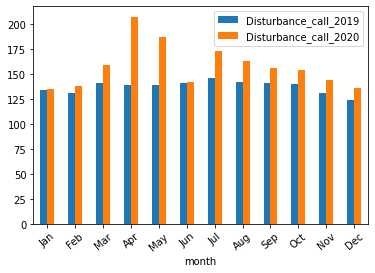

In [25]:
#plots the averages of calls for each month of each year 
df.plot.bar(x = 'month', y = ['Disturbance_call_2019', 'Disturbance_call_2020'], rot = 40)

This Graph shows us in the months of April and May in 2020 there was a larger amount of calls to the police for disturbance of the peace. The covid-19 pandemic started at the end of March. Immediately we can see there was an increase in the average calls per month when the lockdown began. From there, the average amount of calls is still higher compared to 2019, but there is a decreasing trend. 

# Ethics & Privacy

The data that I am using is allowed for public use by the San Diego Parks and Recreations. I think that my data is very ethical. It does not include any information regarding the location at which any of these events occured. The calls are from no specific deomgraphics since the only information we have about the call is the type. We do not have datasets with any personal information that could harm anyone. 

# Conclusion & Discussion

After my analysis, I have concluded that Covid-19 and the 'stay-at-home' order does have an effect on the amount of calls of disturbance. From the first graph, there is a clear increase in calls that started around March. This is that same time california's stay at home order started. Our next graph compared the average calls per month which visually showed that there was an average increase in the mean after the pandemic began. I believe the reason for the decreasing trend after the beginning of the pandemic is because over time people became more relaxed. It is reasonable to believe that people stopped calling as much because over time the pandemic in truth has become normal. It's also fair to say that as we get closer to getting the vaccine people have become more relaxed. 